In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import gzip
from tqdm import tqdm
import numpy as np
import pandas as pd
df = pd.read_csv('pputida_wt_cj522_gb032_gb045_gb062.csv.gz')

In [2]:
df['exp'] = df['Line Name'].str.split('-').apply(lambda x: '-'.join(x[:2]))

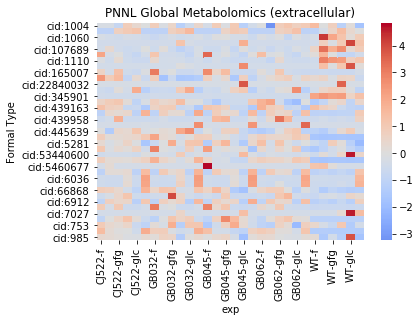

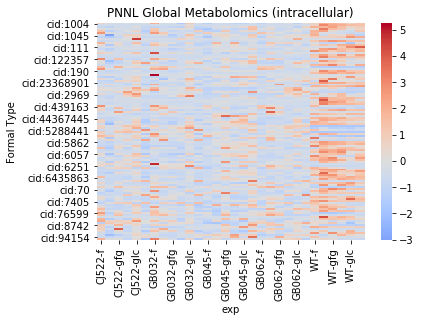

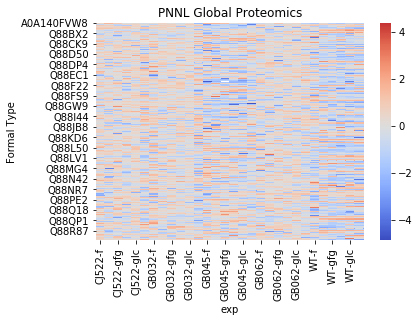

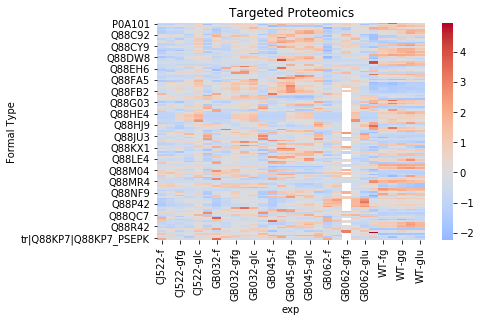

In [21]:
for name, idf in df.groupby('Protocol'):
    plt.figure()
    pivot = idf.pivot_table(values='Value', columns='exp', index='Formal Type')
    sns.heatmap(pivot.transform(lambda x: (x - x.mean()) / x.std(), 1), cmap='coolwarm', center=0)
    plt.title(name)

In [23]:
boundary_data = pd.read_csv('boundary_flux_from_external_measurements.csv')
boundary_data = boundary_data.join(boundary_data['Sample Name'].str.extract(
    '^(?P<strain>\S+)\.(?P<media>\S+)\.(?P<replicate>\d+)'))
# boundary_data.head()

In [25]:
boundary_data.columns

Index(['Sample #', 'Sample Name', 'muconic acid (mM)',
       '2-ketogluconaic acid (gmM)', 'Gluconic acid (mM)', 'Fructose (mM)',
       'Glucose (mM)', 'Strain', 'Media', 'Sample', 'c_mol_balance',
       'Gluconic acid (mM)_diff', 'Fructose (mM)_diff', 'Glucose (mM)_diff',
       'sugar_usage', 'muconate_yield', 'OD of collection', 'growth_rate',
       'delta_cdw', 'gluconate_uptake', 'fructose_uptake', 'glucose_uptake',
       '2-ketogluconate_production', 'muconate_production', 'strain', 'media',
       'replicate'],
      dtype='object')

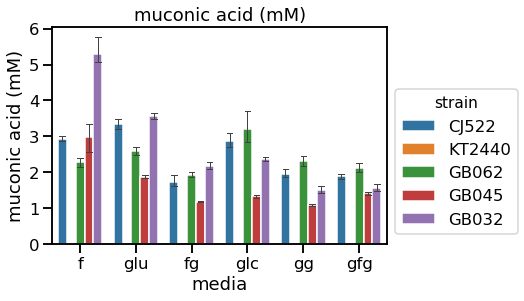

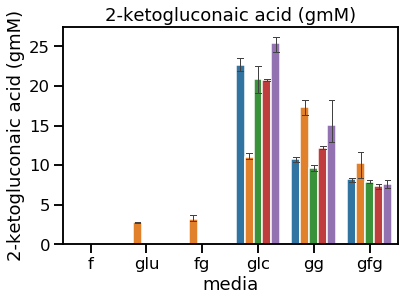

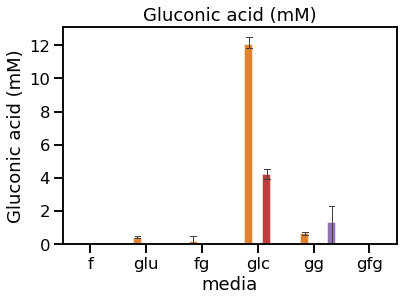

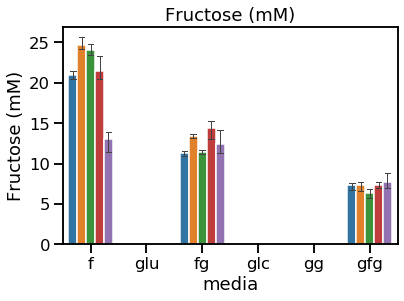

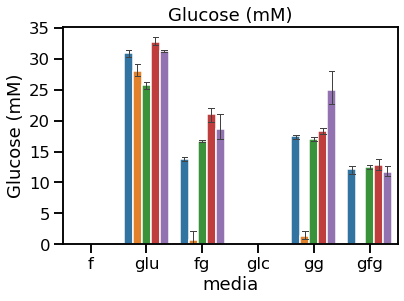

In [53]:
for i, col in enumerate(['muconic acid (mM)',
            '2-ketogluconaic acid (gmM)', 'Gluconic acid (mM)', 'Fructose (mM)',
            'Glucose (mM)']):
    
    with sns.plotting_context('talk'):
        plt.figure()
        sns.barplot(x='media', y=col, hue='strain',
                    data=boundary_data, capsize=.1, errwidth=1, edgecolor='w')
        
        if i == 0:
            plt.gca().get_legend().set_bbox_to_anchor([1., .75])
        else:
            plt.gca().get_legend().remove()
        
        plt.title(col)

In [52]:
leg.remove()